In [ ]:
'''
 * Copyright (c) 2004 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Validation 

Data In the chapter on optimization, we used hyperparameter tuning to select hyperparameters that lead to better results, but one more thing requires clarification. We ​should not​ check different hyperparameters using the test dataset; if we do that, we’re going to be manually optimizing the model to the test dataset, biasing it towards overfitting these data, and these data are supposed to be used only to perform the last check if the model trains and generalizes well. In other words, if we’re tuning our network’s parameters to fit the testing data, then we’re essentially optimizing our network on the testing data, which is another way for overfitting on these data. Thus, hyperparameter tuning using the test dataset is a mistake. The test dataset should only be used as unseen data, not informing the model in any way, which hyperparameter tuning is, other than to test performance. Hyperparameter tuning can be performed using yet another dataset called ​validation data​. The test dataset needs to contain real out-of-sample data, but with a validation dataset, we have more freedom with choosing data. If we have a lot of training data and can afford to use some for validation purposes, we can take it as an out-of-sample dataset, similar to a test dataset. We can now search for parameters that work best using this new validation dataset and test our model

at the end using the test dataset to see if we really tuned the model or just overfitted it to the validation data. There are situations when we’ll be short on data and cannot afford to create yet another dataset from the training data. In those situations, we have two options: The first is to temporarily split the training data into a smaller training dataset and validation dataset for hyperparameter tuning. Afterward, with the final hyperparameter set, train the model on all the training data. We allow ourselves to do that as we tune the model to the part of training data that we put aside as validation data. Keep in mind that we still have a test dataset to check the model’s performance after training. The second possibility in situations where we are short on data is a process called cross-validation​. Cross-validation is primarily used when we have a small training dataset and cannot afford any data for validation purposes. How it works is we split the training dataset into a given number of parts, let’s say 5. We now train the model on the first 4 chunks and validate it on the last. So far, this is similar to the case described previously — we are also only using the training dataset and can validate on data that was not used for training. What makes cross-validation different is that we then swap samples. For example, if we have 5 chunks, we can call them chunks A, B, C, D, and E. We may first train on A, B, C, and D, then validate on E. We’ll then train on A, B, C, E, and validate on D, doing this until we’ve validated on each of the 5 sample groups. This way, we do not lose any training data. We validate using the data that was not used for training during any given iteration and validate on more data than if we just temporarily split the training dataset and train on all of the samples. This validation method is often called k-fold cross-validation; here, our k is 5. Here’s an example of 2 steps of cross-validation:


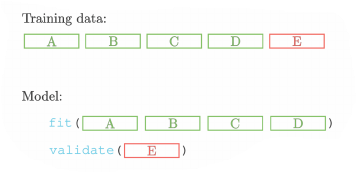
Figure 1:​ Cross-validation, first step.
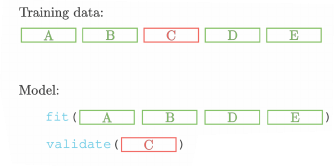

Figure 2:​ Cross-validation, third step.

When using a validation dataset and cross-validation, it is common to loop over different hyperparameter sets, leaving the code to run training multiple times, applying different settings each run, and reviewing the results to choose the best set of hyperparameters. In general, we should not loop over ​all​ possible setting combinations that we would like to check unless training is exceptionally fast. It’s usually better to check some settings that we suspect will work well, pick the best combination of those settings, tweak them to create the next list of setting sets, and train the model on new sets. We can repeat this process as many times as we’d like.




## Training Dataset 

Since we are talking about datasets and testing, it’s worth mentioning a few things about the training dataset and operations that we can perform on it; this technique is referred to as preprocessing​. However, it’s important to remember that any preprocessing we do to our training data also needs to be done to our validation and testing data and later done to the prediction data. Neural networks usually perform best on data consisting of numbers in a range of 0 to 1 or -1 to 1, with the latter being preferable. Centering data on the value of 0 can help with model training as it attenuates weight biasing in some direction. Models can work fine with data in the range of 0 to 1 in most cases, but sometimes we’re going to need to rescale them to a range of -1 to 1 to get training to behave or achieve better results. Speaking of the data range, the values do not have to strictly be in the range of -1 and 1 — the model will perform well with data slightly outside of this range or with just some values being many times bigger. The case here is that when we multiply data by a weight and sum the results with a bias, we’re usually passing the resulting output to an activation function. Many activation functions behave properly within this described range. For example, ​softmax​ outputs a vector of probabilities containing numbers in the range of 0 to 1; ​sigmoid​ also has an output range of 0 to 1,

but ​tanh​ outputs a range from -1 to 1. Another reason why this scaling is ideal is a neural network’s reliance on many multiplication operations. If we multiply by numbers above 1 or below -1, the resulting value is larger in scale than the original one. Within the -1 to 1 range, the result becomes a fraction, a smaller value. Multiplying big numbers from our training data with weights might cause floating-point overflow or instability — weights growing too fast. It’s easier to control the training process with smaller numbers. There are many terms related to data ​preprocessing​: standardization, scaling, variance scaling, mean removal (as mentioned above), non-linear transformations, scaling to outliers, etc., but they are out of the scope of this book. We’re only going to scale data to a range by simply dividing all of the numbers by the maximum of their absolute values. For the example of an image that consists of numbers in the range between ​0​ and ​255​, we divide the whole dataset by ​255​ and return data in the range from ​0​ to ​1.​ We can also subtract ​127.5​ (to get a range from ​-127.5​ to 127.5)​ and divide by 127.5, returning data in the range from -1 to 1. We need to ensure identical scaling for all the datasets (same scale parameters). For example, we can find the maximum for training data and divide training, validation and testing data by this number. In general, we should prepare a scaler of our choice and use its instance on every dataset. It is important to remember that once we train our model and want to predict using new samples, we need to scale those new samples by using the same scaler instance we used on the training, validation, and testing data. In most cases, when we are working with data (e.g., sensor data), we will need to save the scaler object along with the model and use it during prediction as well; otherwise, results are likely to vary as the model might not effectively recognize these data without being scaled. It is usually fine to scale datasets that consist of larger numbers than the training data using a scaler prepared on the training data. If the resulting numbers are slightly outside of the ​-1​ to ​1​ range, it does not affect validation or testing negatively, since we do not train on these data. Additionally, for linear scaling, we can use different datasets to find the maximum as well, but be aware that non-linear scaling can leak the information from other datasets to the training dataset and, in this case, the scaler should be prepared on the training data only. In cases where we do not have many training samples, we could use ​data augmentation​. One easy way to understand augmentation is in the case of images. Let’s imagine that our model’s goal is to detect rotten fruits — apples, for example. We will take a photo of an apple from different angles and predict whether it’s rotten. We should get more pictures in this case, but let’s assume that we cannot. What we could do is to take photos that we have, rotate, crop, and save those as worthy data too. This way, we have added more samples to the dataset, which can help with model generalization. In general, if we use augmentation, then it’s only useful if the augmentations that we make are similar to variations that we could see in reality. For example, we may refrain from using a rotation when creating a model to detect road signs as they are not being rotated in real-life scenarios (in most cases, anyway). The case of a rotated road sign, however, is one you better

consider if you’re making a self-driving car. Just because a bolt came loose on a stop sign, flipping it over, doesn’t mean you no longer need to stop there! How many samples do we need to train the model? There is no single answer to this question — one model might require just a few per class, and another may require a few million or billion. Usually, a few thousand per class will be necessary, and a few tens of thousands should be preferable to start. The difference depends on the data complexity and model size. If the model has to predict sensor data with 2 simple classes, for example, if an image contains a dark area or does not, hundreds of samples per class might be enough. To train on data with many features and several classes, tens of thousands of samples are what you should start with. If you’re attempting to train a chatbot the intricacies of written language, then you’re going to likely want at least millions of samples.



## L1 and L2 Regularization 

Regularization methods​ are those which reduce generalization error. The first forms of regularization that we’ll address are ​L1​ and ​L2 regularization​. L1 and L2 regularization are used to calculate a number (called a ​penalty​) added to the loss value to penalize the model for large weights and biases. Large weights might indicate that a neuron is attempting to memorize a data element; generally, it is believed that it would be better to have many neurons contributing to a model’s output, rather than a select few.
Forward Pass L1 regularization’s penalty is the sum of all the absolute values for the weights and biases. This is a linear penalty as regularization loss returned by this function is directly proportional to parameter values. L2 regularization’s penalty is the sum of the squared weights and biases. This non-linear approach penalizes larger weights and biases more than smaller ones because of the square function used to calculate the result. In other words, L2 regularization is commonly used as it does not affect small parameter values substantially and does not allow the model to grow weights too large by heavily penalizing relatively big values. L1 regularization, because of its linear nature, penalizes small weights more than L2 regularization, causing the model to start being invariant to small inputs and variant only to the bigger ones. That’s why L1 regularization is rarely used alone and usually combined with L2 regularization if it’s even used at all. Regularization functions of this type drive the sum of weights and the sum of parameters towards 0,​ which can also help in cases of exploding gradients (model instability, which might cause weights to become very large values). Beyond this, we also want to dictate how much of an impact we want this regularization penalty to carry. We use a value referred to as ​lambda​ in this equation — where a higher value means a more significant penalty. L1 weight regularization:

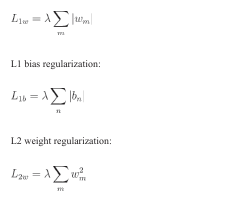

L2 bias regularization:

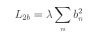

Overall loss:




Using code notation:

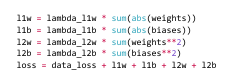

Regularization losses are calculated separately, then summed with the data loss, to form the overall loss. Parameter ​m​ is an arbitrary iterator over all of the weights in a model, parameter ​n​ is the bias equivalent of this iterator, w​m​ is the given weight, and b​n​ is the given bias. To implement regularization in our neural network code, we’ll start with the ​__init__​ method of the ​Dense​ layer’s class, which will house the ​lambda​ regularization strength hyperparameters, since these can be set separately for every layer:
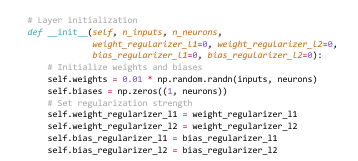


This method sets the lambda hyperparameters. Now we update our loss class to include the additional penalty if we choose to set the lambda hyperparameter for any of the regularizers in the layer’s initialization. We will implement this code into the ​Loss​ class as it is common for the hidden layers. What’s more, the regularization calculation is the same, regardless of

the type of loss used. It’s only a penalty that is summed with the data loss value resulting in a final, overall loss value. For this reason, we’re going to add a new method to a general loss class, which is inherited by all of our specific loss functions (such as our existing Loss_CategoricalCrossentropy​). For the code of this method, we’ll create the layer’s regularization loss variable. We’ll add to it each of the atomic regularization losses if its corresponding lambda value is greater than ​0.​ To perform these calculations, we read the lambda hyperparameters, weights, and biases from the passed-in layer object. For our general loss class:


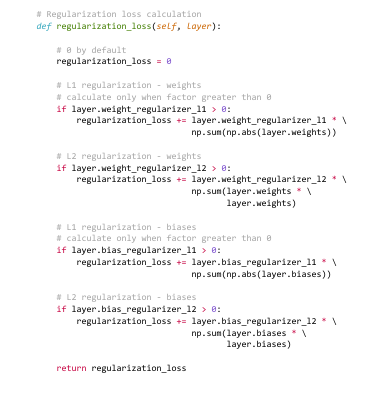

Then we’ll calculate the regularization loss and add it to our calculated loss in the training loop:

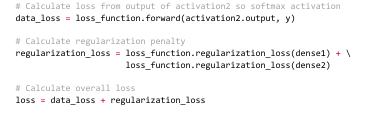

We created a new ​regularization_loss​ variable and added all layer’s regularization losses to it. This completes the forward pass for regularization, but this also means our overall loss has changed since part of the calculation can include regularization, which must be accounted for in the backpropagation of the gradients. Thus, we will now cover the partial derivatives for both L1 and L2 regularization.



## Backward pass 

The derivative of L2 regularization is relatively simple:

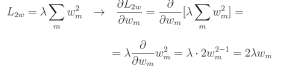

This might look complicated, but is one of the simpler derivative calculations that we have to derive in this book. Lambda is a constant, so we can move it outside of the derivative term. We can remove the sum operator since we calculate the partial derivative with respect to the given parameter only, and the sum of one element equals this element. So, we only need to calculate the derivative of ​w2​ ​, which we know is ​2w.​ From the coding perspective, we will multiply all of the weights by ​2λ.​ We’ll implement this with NumPy directly as it’s just a simple multiplication operation. L1 regularization’s derivative, on the other hand, requires more explanation. In the case of L1 regularization, we must calculate the derivative of the absolute value piecewise function, which effectively multiplies a value by -1 if it is less than 0; otherwise, it’s multiplied by 1. This is because the absolute value function is linear for positive values, and we know that a linear function’s derivative is:

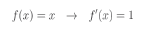

For negative values, it negates the sign of the value to make it positive. In other words, it multiplies values by -1:


When we combine that:


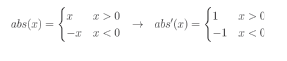

And the complete partial derivative of L1 regularization with respect to given weight:

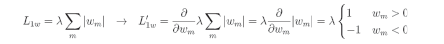

Like L2 regularization, lambda is a constant, and we calculate the partial derivative of this regularization with respect to the specific input. The partial derivative, in this case, equals 1 or -1 depending on the w​m​ (weight) value. We are calculating this derivative with respect to weights, and the resulting gradient, which has the same shape as the weights, is what we’ll use to update the weights. To put this into pure Python code:
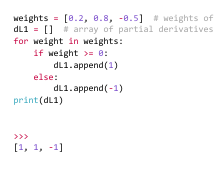

You may have noticed that we’re using ​>= ​0​ in the code where the equation above clearly depicts > 0​. If we picture the ​np.abs​ function, it’s a line going down and “bouncing” at the value ​0,​ like a saw tooth. At the pointed end (i.e., the value of ​0​), the derivative of the ​np.abs​ function is undefined, but we cannot code it this way, so we need to handle this situation and break this rule a bit.

Now let’s try to modify this L1 derivative to work with multiple neurons in a layer:

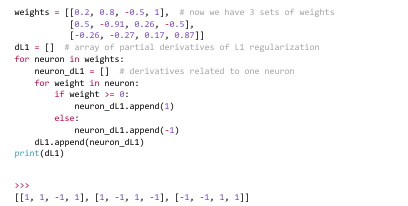

That’s the vanilla Python version, now for the NumPy version. With NumPy, we’re going to use conditions and binary masks. We’ll create the gradient as an array filled with values of ​1​ and shaped like weights, using ​np.ones_like(weights)​. Next, the condition ​weights ​< ​0 returns an array of the same shape as ​dL1​, containing ​0​ where the condition is false and ​1​ where it’s true. We’re using this as a binary mask to ​dL1​ to set values to -​1​ only where the condition is true (where weight values are less than 0):

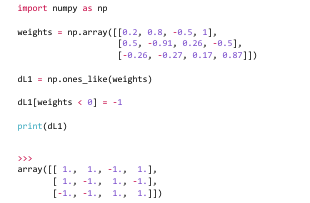

This returned an array of the same shape containing values of 1 and -1 — the partial gradient of the ​np.abs​ function (we still have to multiply it by the lambda hyperparameter). We can now

14 take these and update the backward pass method for the dense layer object. For L1 regularization, we’ll take the code above and multiply it by ​λ​ for weights and perform the same operation for biases. For L2 regularization, as discussed at the beginning of this chapter, all we need to do is take the weights/biases, multiply them by ​2λ​, and add that product to the gradients:

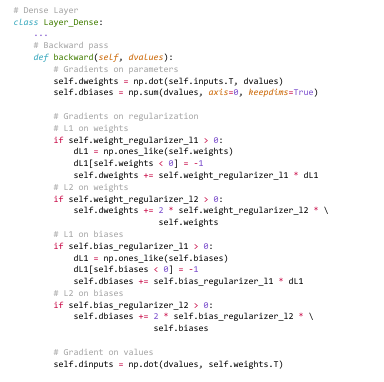
With this, we can update our print to include new information — regularization loss and overall loss:


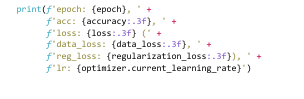

Then we can add weight and bias regularizer parameters when defining a layer:
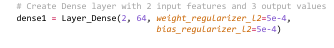

We usually add regularization terms to the hidden layers only. Even if we are calling the regularization method on the output layer as well, it won’t modify gradients if we do not set the lambda hyperparameters to values other than ​0.​



## Fulla code

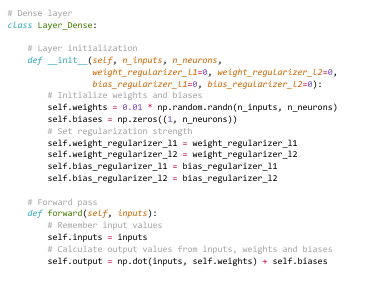
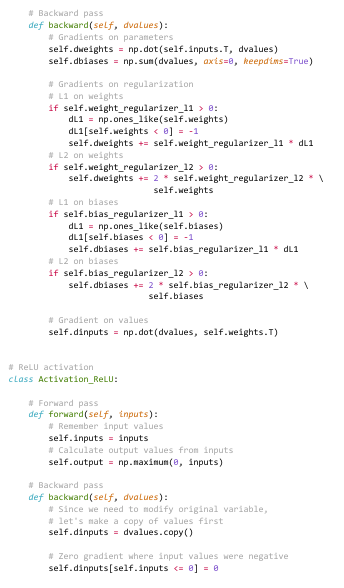

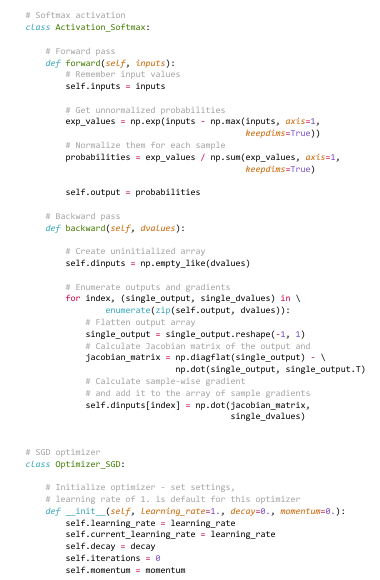

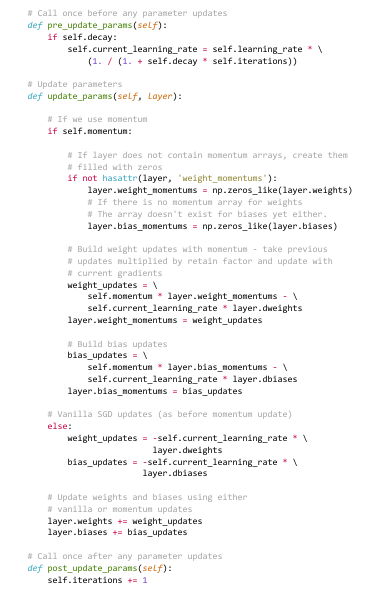

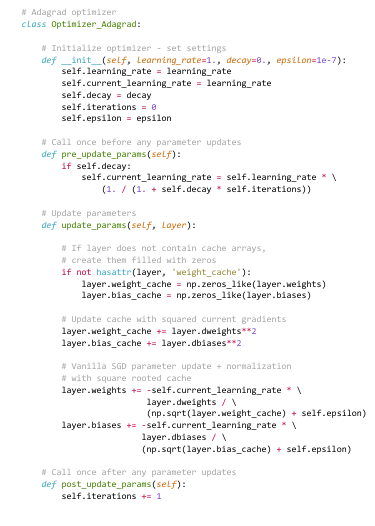

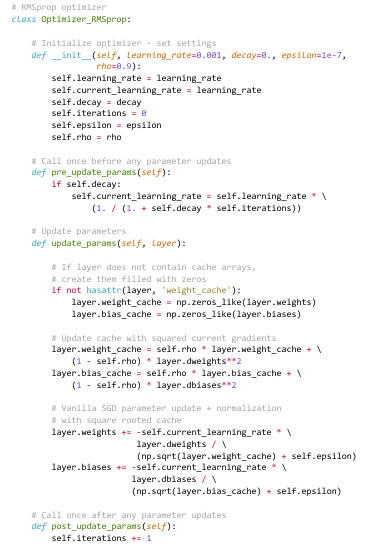

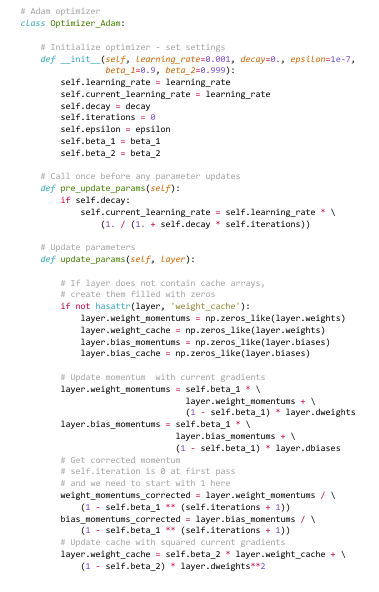
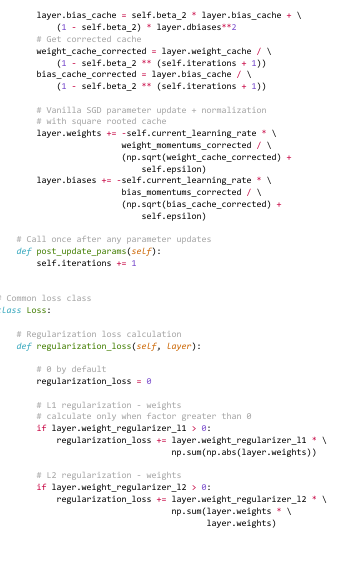

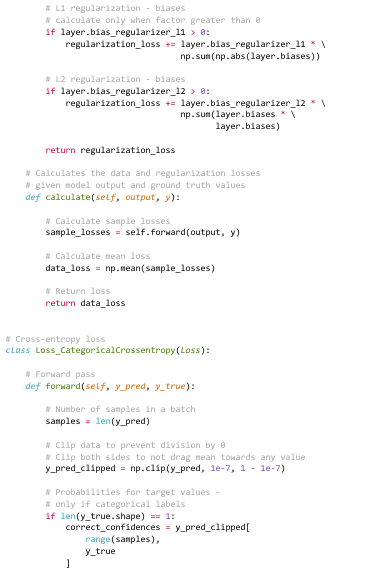


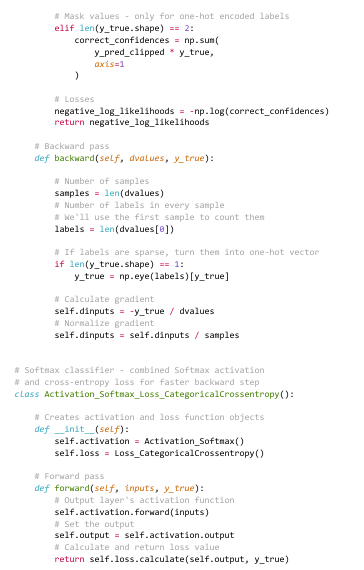
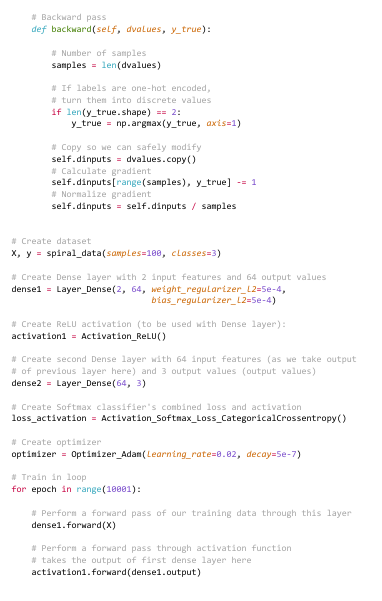


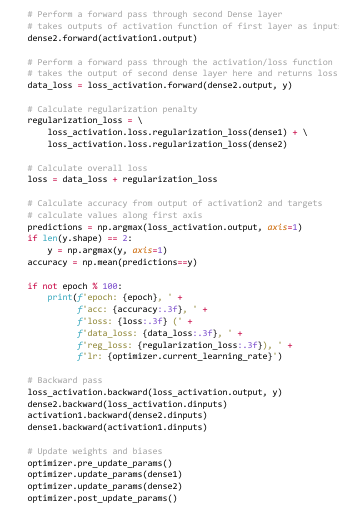

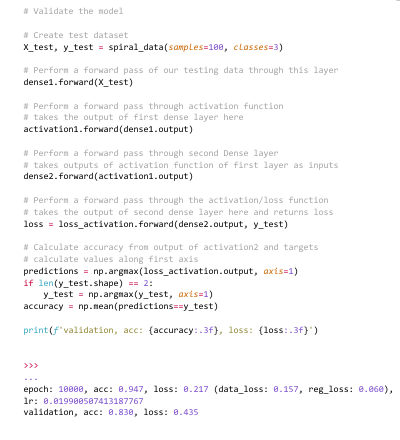

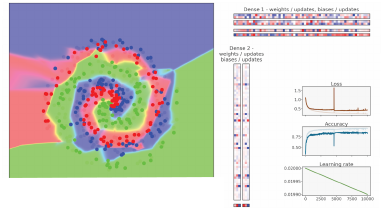

Figure 1:​ Training with regularization

This animation shows the training data in the background (dimmed dots) and the validation data in the foreground. After adding the L2 regularization term to the hidden layer, we achieved a lower validation loss (0.858 before adding regularization in, 0.435 now) and higher accuracy (0.803 before, 0.830 now). We can also take a moment to exemplify how a simple increase in data for training can make a large difference. If we grow from 100 samples to 1,000 samples:



And run the code again:

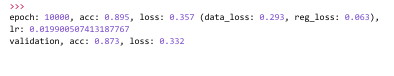

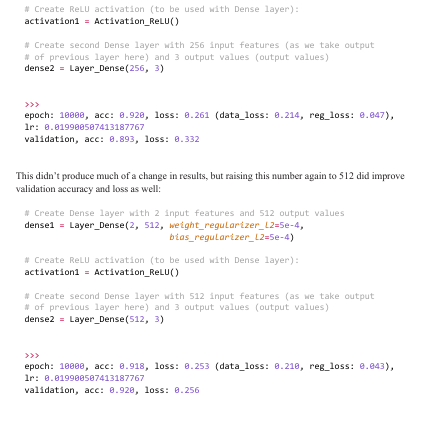

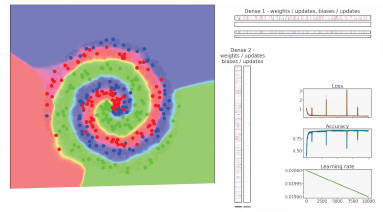
Figure 3:​ Training with regularization and more training data (tuned).

In this case, we see that the accuracies and losses for in-sample and out-of-sample data are almost identical. From here, we could add either more layers and neurons or both. Feel free to tinker with this to try to improve it. Next, we’re going to cover another regularization method: ​dropout​.